In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.svm import NuSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics



In [149]:
!pip install tpot
import tpot


     ---------------------------------------- 87.2/87.2 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 114.3/114.3 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=5fe527872b4000022581373a2336373022026acf959443f2175a5b9b3f9695ab
  Stored in directory: c:\users\borys\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


c:\Users\borys\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [5]:
#We import cleaned data

bankrupcy = pd.read_csv(r'C:\Users\borys\IronHack\Project_week_7\cleaned_bankrupcy_data.csv')
bankrupcy.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [6]:
bankrupcy.columns

Index(['Unnamed: 0', 'Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
    

In [7]:
bankrupcy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
bankrupcy

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [11]:
x = bankrupcy.drop(['Bankrupt?'],  axis=1)
y = bankrupcy['Bankrupt?']
# print(X.head())
print(x.shape)
# print(y.head())
print(y.shape)

(6819, 94)
(6819,)


# --------FEATURES SELECTION--------

In [16]:
# We are checking which features = columns will be most relevant for our modelin

rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
m=rfe_selector.fit(x, y)
x.columns[m.get_support()]
print('Num Features: %s' % (m.n_features_))
print('Selected Features: %s' % (m.support_))
print('Feature Ranking: %s' % (m.ranking_))

Num Features: 20
Selected Features: [False False False False False False False False  True False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False False False  True  True False
 False  True False  True False False  True False False  True False False
 False False False False False False False False  True False  True False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False  True False False False  True False  True  True  True]
Feature Ranking: [11 31 15 27 42 73 39 37  1  6  5 50 44  1 74  1 20  3  1 65 33 48  1 55
 35 70 32 40 52  1 17 62 59  1  1  7 12  1 51  1 71 63  1 67 64  1 13 22
 10 46 18 19 16  9 61 60  1 26  1 53 47  2 38 58  1 45 72 25 14 43 24 28
 23 36 54 57 56 29 41 21 49 68 66 34 75  1  8  4 69  1 30  1  1  1]


In [17]:
x.loc[:, m.support_].columns

Index([' Non-industry income and expenditure/revenue',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Cash/Total Assets',
       ' Cash/Current Liability', ' Working Capital/Equity',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability'],
      dtype='object')

In [19]:
#We are redefining x into xf (x features) with selection proposed by above algorithm

xf=x[[' Non-industry income and expenditure/revenue',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio', ' Net worth/Assets',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Cash/Total Assets',
       ' Cash/Current Liability', ' Working Capital/Equity',
       ' Net Income to Total Assets', " Net Income to Stockholder's Equity",
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']]

In [20]:
xf_train, xf_test, y_train, y_test = train_test_split(xf, y, test_size=0.3, random_state=22)
print(xf_train.shape)
print(y_train.shape)
print(xf_test.shape)
print(y_test.shape)

(4773, 20)
(4773,)
(2046, 20)
(2046,)


In [35]:
#Below we define function to allow us seeing results in organized way

def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print('\nThe classification report for ' + name + ' is:', cl_rep, sep = '\n')
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

# --------Logistic Regression Model--------

The accuracy of the Logistic Regression is: 96.33431085043989 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1973
           1       0.47      0.25      0.32        73

    accuracy                           0.96      2046
   macro avg       0.72      0.62      0.65      2046
weighted avg       0.95      0.96      0.96      2046



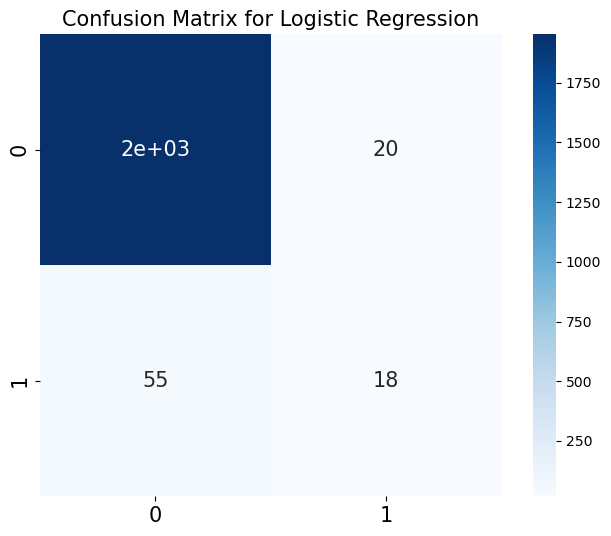

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(xf_train)
x_test = sc.transform(xf_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')

generate_results(lr, y_pred, 'Logistic Regression')

In [144]:
#Model Evaluation - Metrics:

print("Accuracy_score:",metrics.accuracy_score(y_test , y_pred))
print("Precision_score:",metrics.precision_score(y_test , y_pred))
print("Recall_score:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))
print("Roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))

Accuracy_score: 0.9633431085043989
Precision_score: 0.47368421052631576
Recall_score: 0.2465753424657534
F1_score: 0.3243243243243243
Roc_auc_score: 0.6182192475126538


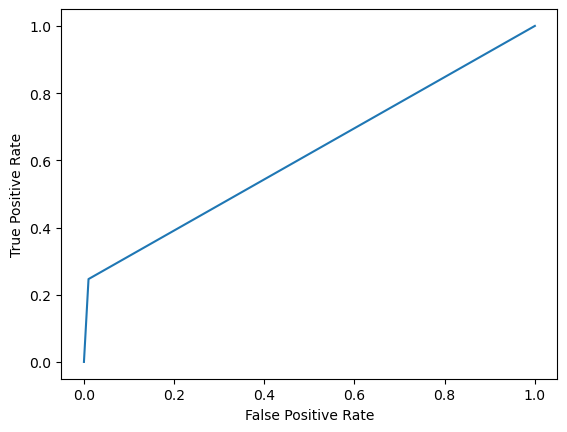

In [139]:
fpr, tpr, thresholds = metrics.roc_curve(y_test , y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [151]:
# TPOT Modeling

print("tpot: %s" % tpot.__version__)
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(xf_train, y_train)

tpot: 0.11.7


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971296826808039

Generation 2 - Current best internal CV score: 0.971296826808039

Generation 3 - Current best internal CV score: 0.971296826808039

Generation 4 - Current best internal CV score: 0.9725540298769578

Generation 5 - Current best internal CV score: 0.9725540298769578

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

# ------NuSVC------

(4773, 20)
(4773,)
(2046, 20)
(2046,)
NuSVC(class_weight='balanced', nu=0.036)
Score:  0.9388225434737063
CV average score: 0.14
[[1893   80]
 [  67    6]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1973
           1       0.07      0.08      0.08        73

    accuracy                           0.93      2046
   macro avg       0.52      0.52      0.52      2046
weighted avg       0.93      0.93      0.93      2046


The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1973
           1       0.07      0.08      0.08        73

    accuracy                           0.93      2046
   macro avg       0.52      0.52      0.52      2046
weighted avg       0.93      0.93      0.93      2046



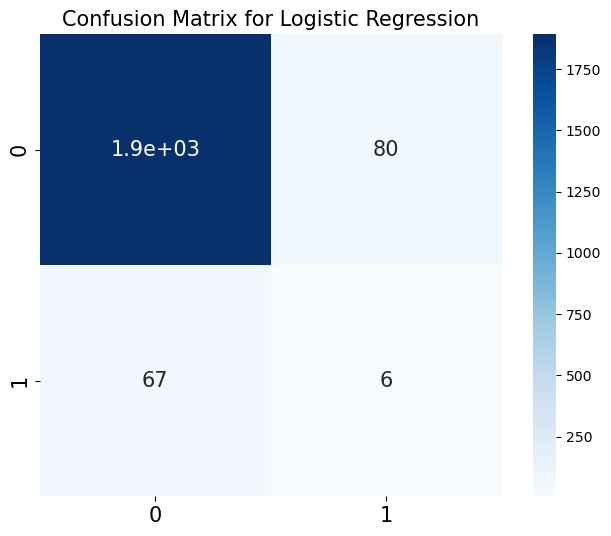

Accuracy_score: 0.9281524926686217
Precision_score: 0.06976744186046512
Recall_score: 0.0821917808219178
F1_score: 0.07547169811320754
Roc_auc_score: 0.5208221955300668


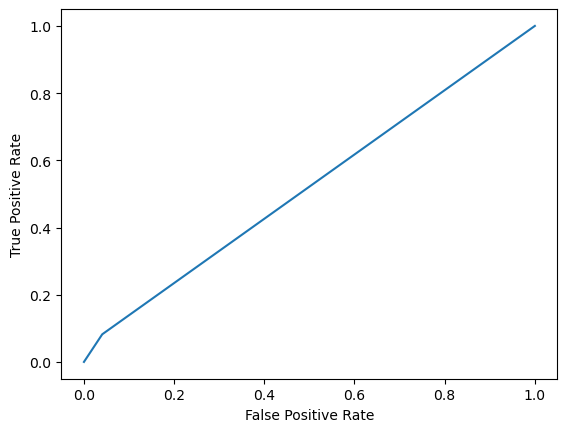

tpot: 0.11.7


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971296826808039

Generation 2 - Current best internal CV score: 0.971296826808039

Generation 3 - Current best internal CV score: 0.971296826808039

Generation 4 - Current best internal CV score: 0.9725540298769578

Generation 5 - Current best internal CV score: 0.9725540298769578

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [161]:
xf_train, xf_test, y_train, y_test = train_test_split(xf, y, test_size=0.3, random_state=22)
print(xf_train.shape)
print(y_train.shape)
print(xf_test.shape)
print(y_test.shape)


nsvc = NuSVC(nu=0.0360, class_weight="balanced")
print(nsvc)

nsvc.fit(xf_train, y_train)
score = nsvc.score(xf_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(nsvc, xf_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = nsvc.predict(xf_test)

cm = confusion_matrix(y_test, ypred)
print(cm)

cr = classification_report(y_test, ypred)
print(cr) 

generate_results(nsvc, ypred, 'Logistic Regression')

#Model Evaluation - Metrics:

print("Accuracy_score:",metrics.accuracy_score(y_test , ypred))
print("Precision_score:",metrics.precision_score(y_test , ypred))
print("Recall_score:",metrics.recall_score(y_test, ypred))
print("F1_score:",metrics.f1_score(y_test, ypred))
print("Roc_auc_score:",metrics.roc_auc_score(y_test, ypred))



fpr, tpr, thresholds = metrics.roc_curve(y_test , ypred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# TPOT Modeling

print("tpot: %s" % tpot.__version__)
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(xf_train, y_train)

# ------BernoulliNB / Bernoulli Naive Bayes / BNB------

In [ ]:
bankrupcy.columns

In [64]:
#checking if 'message' feature is binary or not
np.unique(bankrupcy['Bankrupt?'])

array([0, 1], dtype=int64)

In [68]:
xf

,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Quick Ratio,Interest Expense Ratio,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Accounts Receivable Turnover,Cash/Total Assets,Cash/Current Liability,Working Capital/Equity,Net Income to Total Assets,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.302646,7.250730e-04,0.147950,0.169141,0.138736,0.000327,0.001208,0.629951,0.792424,0.390284,0.137757,0.001814,0.004094,1.473360e-04,0.721275,0.716845,0.827890,0.026601,0.564050,0.016469
1,0.303556,6.470650e-04,0.182251,0.208944,0.169918,0.000443,0.004039,0.635172,0.828824,0.376760,0.168962,0.001286,0.014948,1.383910e-03,0.731975,0.795297,0.839969,0.264577,0.570175,0.020794
2,0.302035,7.900790e-04,0.177911,0.180581,0.142803,0.000396,0.005348,0.629631,0.792484,0.379093,0.148036,0.001495,0.000991,5.340000e+09,0.742729,0.774670,0.836774,0.026555,0.563706,0.016474
3,0.303350,4.490450e-04,0.154187,0.193722,0.148603,0.000382,0.002896,0.630228,0.848535,0.379743,0.147561,0.001966,0.018851,1.010646e-03,0.729825,0.739555,0.834697,0.026697,0.564663,0.023982
4,0.303475,6.860690e-04,0.167502,0.212537,0.168412,0.000439,0.003727,0.636055,0.893491,0.375025,0.167461,0.001449,0.014161,6.804640e-04,0.732000,0.795016,0.839973,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.303510,1.790180e-04,0.175045,0.216602,0.172102,0.000450,0.005457,0.631415,0.875382,0.373823,0.171111,0.000690,0.099481,5.071548e-03,0.736716,0.799927,0.840359,0.027064,0.566193,0.029890
6815,0.303520,2.370240e-04,0.181324,0.216697,0.172780,0.000445,0.006741,0.631489,0.900747,0.372505,0.171805,0.000655,0.080337,4.727181e-03,0.734584,0.799748,0.840306,0.027009,0.566018,0.038284
6816,0.303512,0.000000e+00,0.269521,0.210929,0.173232,0.000435,0.035112,0.630612,0.961061,0.369637,0.172287,0.001510,0.412885,8.821248e-02,0.737432,0.797778,0.840138,0.026791,0.565158,0.097649
6817,0.303498,2.110210e-04,0.213392,0.228326,0.185584,0.000529,0.007256,0.630731,0.913021,0.369649,0.182498,0.000716,0.112238,7.133218e-03,0.736713,0.811808,0.841084,0.026822,0.565302,0.044009


  (0, 30)	1
  (0, 24)	1
  (0, 23)	1
  (0, 1)	1
  (0, 17)	1
  (0, 40)	1
  (1, 25)	2
  (1, 3)	1
  (1, 10)	1
  (1, 37)	1
  (2, 29)	1
  (2, 49)	1
  (2, 33)	1
  (2, 42)	1
  (3, 34)	1
  (3, 15)	1
  (3, 22)	1
  (3, 45)	1
  (3, 26)	1
  (3, 20)	1
  (3, 41)	1
  (4, 29)	1
  (4, 33)	1
  (4, 42)	1
  (4, 35)	1
  :	:
  (14, 16)	1
  (15, 23)	1
  (15, 29)	1
  (15, 2)	1
  (15, 47)	1
  (15, 46)	1
  (16, 23)	1
  (16, 29)	1
  (16, 16)	1
  (16, 46)	1
  (16, 43)	1
  (17, 11)	1
  (17, 31)	1
  (17, 19)	1
  (17, 27)	1
  (17, 13)	1
  (18, 25)	2
  (18, 38)	1
  (18, 18)	1
  (18, 46)	1
  (18, 8)	1
  (18, 14)	1
  (19, 28)	1
  (19, 16)	1
  (19, 46)	1
[[1973    0]
 [  73    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1973
           1       0.00      0.00      0.00        73

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.93      0.96      0.95      2046


The classification

c:\Users\borys\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(
c:\Users\borys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\borys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

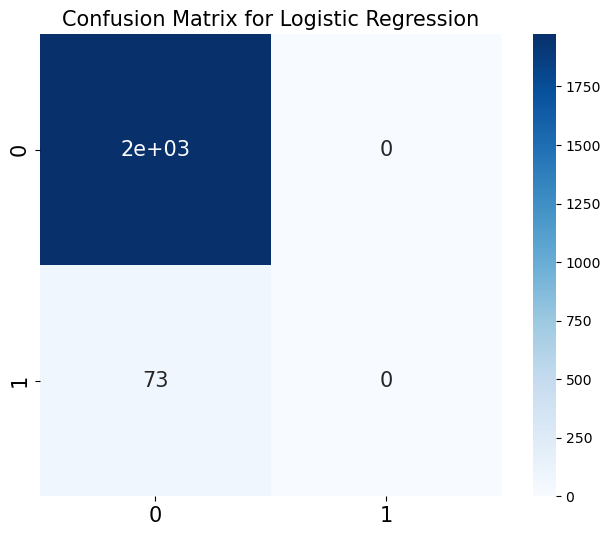

Accuracy_score: 0.9643206256109482
Precision_score: 0.0
Recall_score: 0.0
F1_score: 0.0
Roc_auc_score: 0.5


c:\Users\borys\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


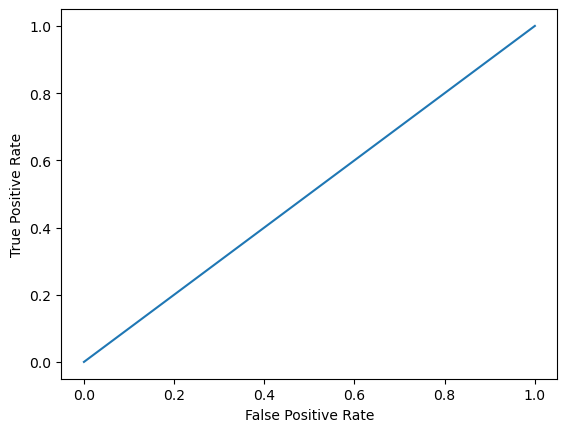

tpot: 0.11.7


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971296826808039

Generation 2 - Current best internal CV score: 0.971296826808039

Generation 3 - Current best internal CV score: 0.971296826808039

Generation 4 - Current best internal CV score: 0.9725540298769578

Generation 5 - Current best internal CV score: 0.9725540298769578

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [164]:
import scipy as sp

# creating count vectorizer object
cv = CountVectorizer()
#tranforming values
x_train_tr = cv.fit_transform(xf_train)
x_train_tr
x_test_tr = cv.fit_transform(xf_test)
x_test_tr
print(x_train_tr)

clfbnb = BernoulliNB()
clfbnb.fit(x_train, y_train)
ypredclfbnb = clfbnb.predict(xf_test)

cm = confusion_matrix(y_test, ypredclfbnb)
print(cm)

cr = classification_report(y_test, ypredclfbnb)
print(cr) 

generate_results(clfbnb, ypredclfbnb, 'Logistic Regression')

#Model Evaluation - Metrics:

print("Accuracy_score:",metrics.accuracy_score(y_test , ypredclfbnb))
print("Precision_score:",metrics.precision_score(y_test , ypredclfbnb))
print("Recall_score:",metrics.recall_score(y_test, ypredclfbnb))
print("F1_score:",metrics.f1_score(y_test, ypredclfbnb))
print("Roc_auc_score:",metrics.roc_auc_score(y_test, ypredclfbnb))

fpr, tpr, thresholds = metrics.roc_curve(y_test , ypredclfbnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# TPOT Modeling

print("tpot: %s" % tpot.__version__)
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(xf_train, y_train)

# ------AdaBoost Classifier-------

Adaboost train/test accuracies: 0.989/0.970

The classification report for AdaBoost Classifier is:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1973
           1       0.64      0.37      0.47        73

    accuracy                           0.97      2046
   macro avg       0.81      0.68      0.73      2046
weighted avg       0.97      0.97      0.97      2046



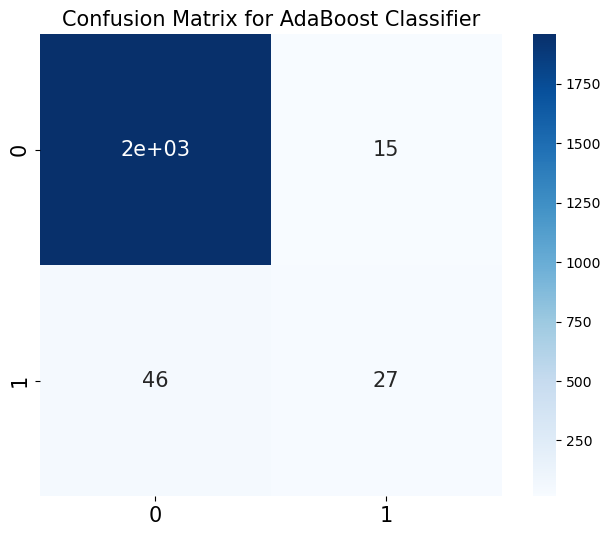

Accuracy_score: 0.9701857282502444
Precision_score: 0.6428571428571429
Recall_score: 0.3698630136986301
F1_score: 0.46956521739130436
Roc_auc_score: 0.6811301890591478


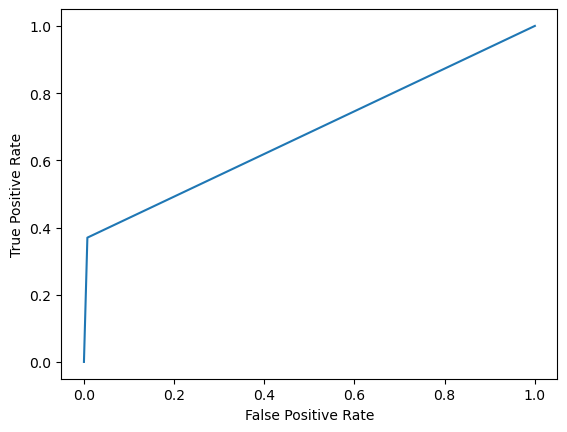

tpot: 0.11.7


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971296826808039

Generation 2 - Current best internal CV score: 0.971296826808039

Generation 3 - Current best internal CV score: 0.971296826808039

Generation 4 - Current best internal CV score: 0.9725540298769578

Generation 5 - Current best internal CV score: 0.9725540298769578

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [165]:
ada = AdaBoostClassifier(
           
           n_estimators=500,
           learning_rate=0.5,
           random_state=42)

#The n_estimators specify that boosting is terminated and A higher learning rate increases the contribution of each classifier
#Let’s fit the AdaBoost model using the training set
ada = ada.fit(xf_train, y_train)

#let’s predict the training set using this model
y_train_pred = ada.predict(xf_train)

#predict the test set
y_test_pred = ada.predict(xf_test)

#let’s see the performance of the model on the training and test set
ada_train = accuracy_score(y_train, y_train_pred)

#let’s see the accuracy score of the model on the test set
ada_test = accuracy_score(y_test, y_test_pred)

#Beautiful. We calculated the accuracy scores. Now, let’s print these scores.
print(f'Adaboost train/test accuracies: {ada_train:.3f}/{ada_test:.3f}')


generate_results(ada, y_test_pred, 'AdaBoost Classifier')

#Model Evaluation - Metrics:

print("Accuracy_score:",metrics.accuracy_score(y_test , y_test_pred))
print("Precision_score:",metrics.precision_score(y_test , y_test_pred))
print("Recall_score:",metrics.recall_score(y_test, y_test_pred))
print("F1_score:",metrics.f1_score(y_test, y_test_pred))
print("Roc_auc_score:",metrics.roc_auc_score(y_test, y_test_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test , y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# TPOT Modeling

print("tpot: %s" % tpot.__version__)
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(xf_train, y_train)

# ------Linear Discriminant Analysis-------

(4773, 20)
(4773,)
(2046, 20)
(2046,)
Accuracy_score: 0.9652981427174976
Precision_score: 0.5227272727272727
Recall_score: 0.3150684931506849
F1_score: 0.3931623931623932
Roc_auc_score: 0.6522124016691083


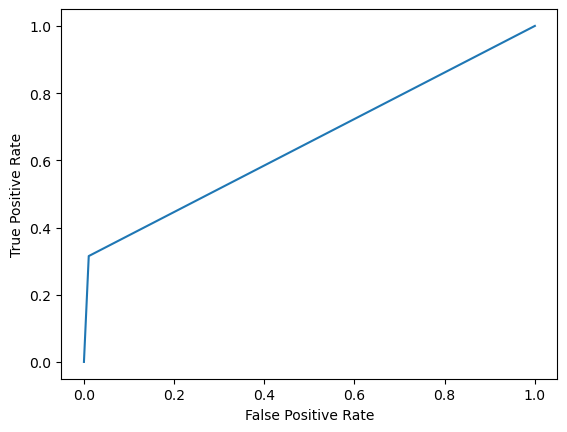

tpot: 0.11.7


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971296826808039

Generation 2 - Current best internal CV score: 0.971296826808039

Generation 3 - Current best internal CV score: 0.971296826808039

Generation 4 - Current best internal CV score: 0.9725540298769578

Generation 5 - Current best internal CV score: 0.9725540298769578

Best pipeline: RandomForestClassifier(MultinomialNB(input_matrix, alpha=0.1, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.15000000000000002, min_samples_leaf=6, min_samples_split=17, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [163]:
#define predictor and response variables
xf_train, xf_test, y_train, y_test = train_test_split(xf, y, test_size=0.3, random_state=22)
print(xf_train.shape)
print(y_train.shape)
print(xf_test.shape)
print(y_test.shape)

X = xf
y = y


#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(xf_train, y_train)
y_pred = model.predict(xf_test)


#Model Evaluation - Metrics:

print("Accuracy_score:",metrics.accuracy_score(y_test , y_pred))
print("Precision_score:",metrics.precision_score(y_test , y_pred))
print("Recall_score:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))
print("Roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test , y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# TPOT Modeling

print("tpot: %s" % tpot.__version__)
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(xf_train, y_train)

# ----- Hyperparameters tuning (if needed) ------

We have identified 1 model that needed "refining" of its accuracy -> NuSVC

Hyper Tuning of Data for Model		
nsvc = NuSVC(nu=0.07, class_weight="balanced")		
		
	Value	Accuracy Output
nu	0.07	Error
nu	0.06	0.9706683428
nu	0.05	0.0624345276
nu	0.04	0.9702493191
nu	0.041	0.9648020113
nu	0.039	0.9704588309
nu	0.038	0.9704588309
nu	0.037	0.9708778546
nu	0.0365	0.9708778546
nu	0.036	0.9388225435
